In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [2]:
# fetching dataset
df = pd.read_csv('/content/indian-ev-data.csv')
df.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


In [ ]:
print('DF Shape: ', df.shape)

DF Shape:  (50, 11)


In [ ]:
# checking the info (columns, datatypes, nulls) of the dataset
print(' <<< DATASET  -----------------------------------------------------------')
print(df.info())

 <<< DATASET  -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50 non-null     int64  
 1   Model                   50 non-null     object 
 2   Manufacturer            50 non-null     object 
 3   Vehicle Type            50 non-null     object 
 4   Battery Capacity (kWh)  50 non-null     float64
 5   Range per Charge (km)   50 non-null     int64  
 6   Charging Time           49 non-null     float64
 7   Price                   49 non-null     float64
 8   Power (HP or kW)        49 non-null     float64
 9   Top Speed (km/h)        49 non-null     float64
 10  Year of Manufacture     49 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.4+ KB
None


In [ ]:
d1 = df.describe()
display('<<< DATASET >>>', d1)

'<<< DATASET >>>'

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.00000,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.50000,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,14.57738,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,1.00000,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,13.25000,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,25.50000,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,37.75000,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,50.00000,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


<ipython-input-19-267f91b41c28>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year of Manufacture', palette='viridis')


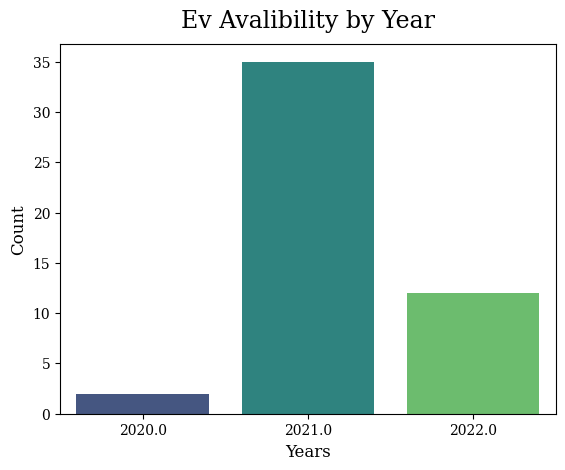

In [ ]:
sns.countplot(data=df, x='Year of Manufacture', palette='viridis')
plt.xlabel('Years', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Ev Avalibility by Year', family='serif', size=17, pad=12)
plt.show()

<ipython-input-26-240a49a64e20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y=df['Model'].sort_values(ascending=True), x='Top Speed (km/h)', palette='viridis')


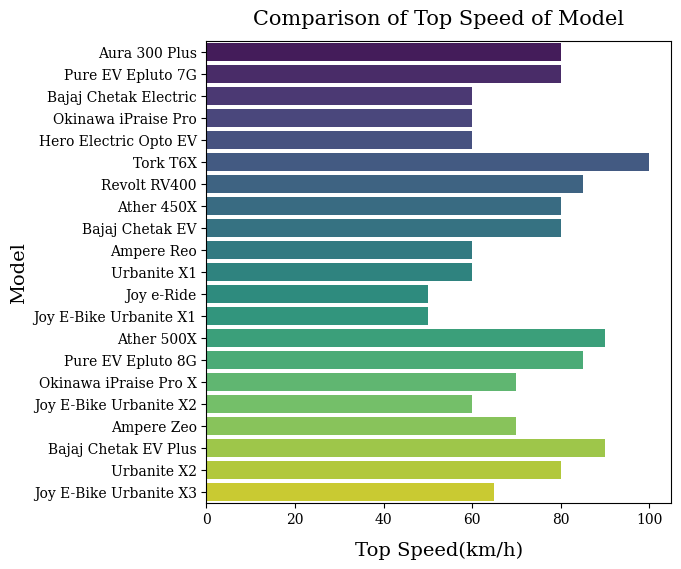

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Model'].sort_values(ascending=True), x='Top Speed (km/h)', palette='viridis')
plt.ylabel('Model', fontsize=14, family='serif')
plt.xlabel('Top Speed(km/h)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Comparison by Top Speed of Model', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-27-8e6ba81eddde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y=df['Model'].sort_values(ascending=True), x='Power (HP or kW)', palette='viridis')


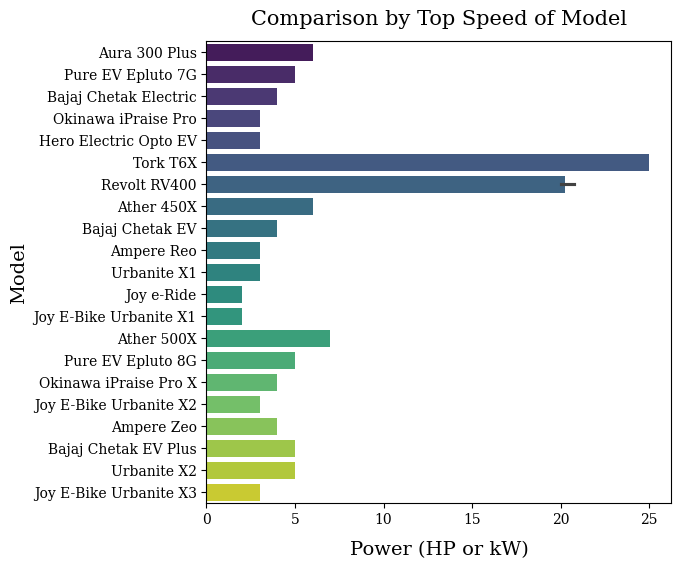

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Model'].sort_values(ascending=True), x='Power (HP or kW)', palette='viridis')
plt.ylabel('Model', fontsize=14, family='serif')
plt.xlabel('Power (HP or kW)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Comparison by Power of Model', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-30-dfb1be832751>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y=df['Model'].sort_values(ascending=True), x='Price', palette='viridis')


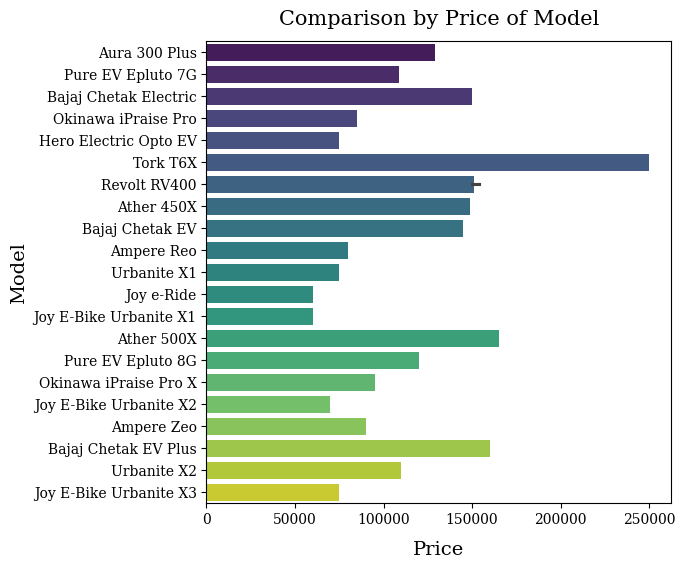

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Model'].sort_values(ascending=True), x='Price', palette='viridis')
plt.ylabel('Model', fontsize=14, family='serif')
plt.xlabel('Price', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Comparison by Price of Model', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-32-9b9509f7bfe6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y=df['Model'].sort_values(ascending=True), x='Charging Time', palette='viridis')


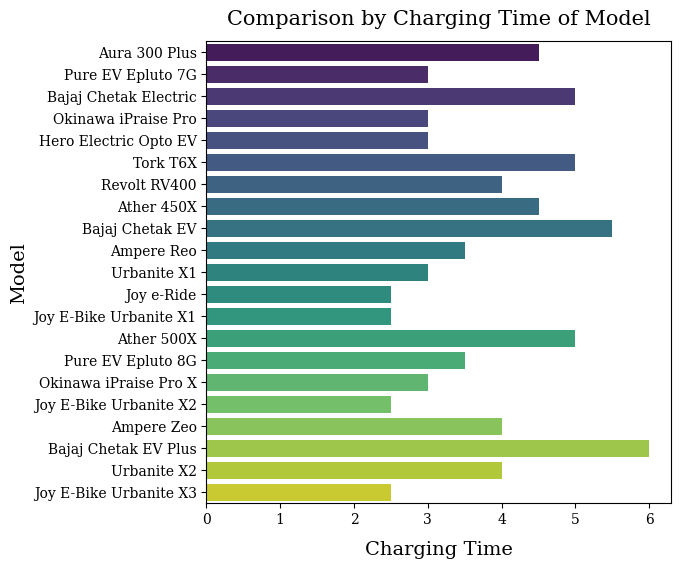

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Model'].sort_values(ascending=True), x='Charging Time', palette='viridis')
plt.ylabel('Model', fontsize=14, family='serif')
plt.xlabel('Charging Time', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Comparison by Charging Time of Model', weight=200, family='serif', size=15, pad=12)
plt.show()

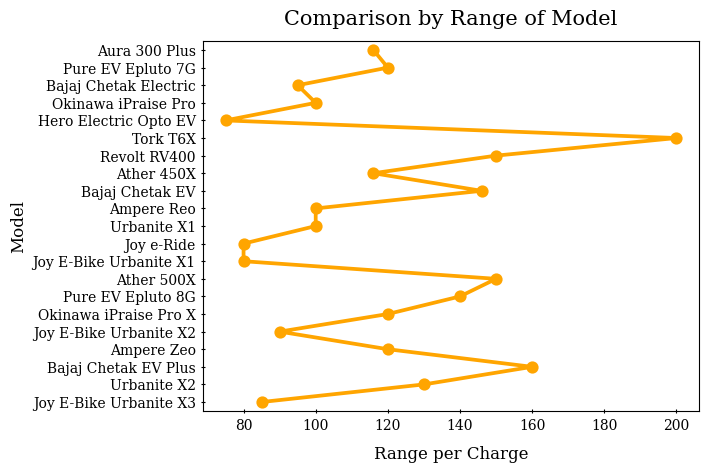

In [ ]:
sns.pointplot(data=df, y='Model', x='Range per Charge (km)', color='orange')
plt.xlabel('Range per Charge', family='serif', size=12, labelpad=10)
plt.ylabel('Model', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='Comparison by Range of Model', weight=200, family='serif', size=15, pad=12)
plt.show()

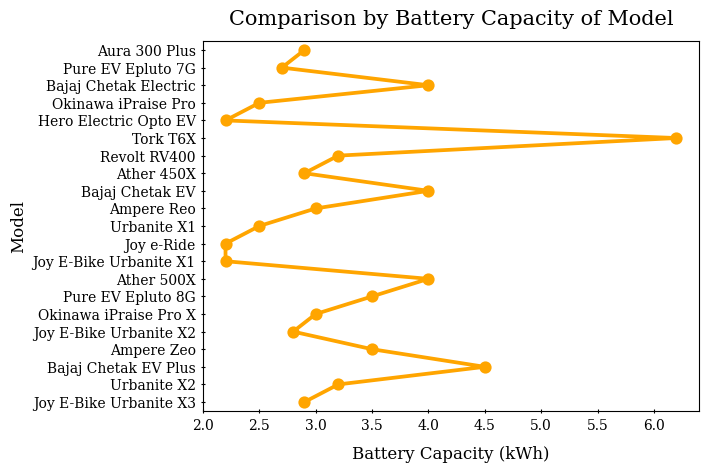

In [ ]:
sns.pointplot(data=df, y='Model', x='Battery Capacity (kWh)', color='orange')
plt.xlabel('Battery Capacity (kWh)', family='serif', size=12, labelpad=10)
plt.ylabel('Model', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='Comparison by Battery Capacity of Model', weight=200, family='serif', size=15, pad=12)
plt.show()

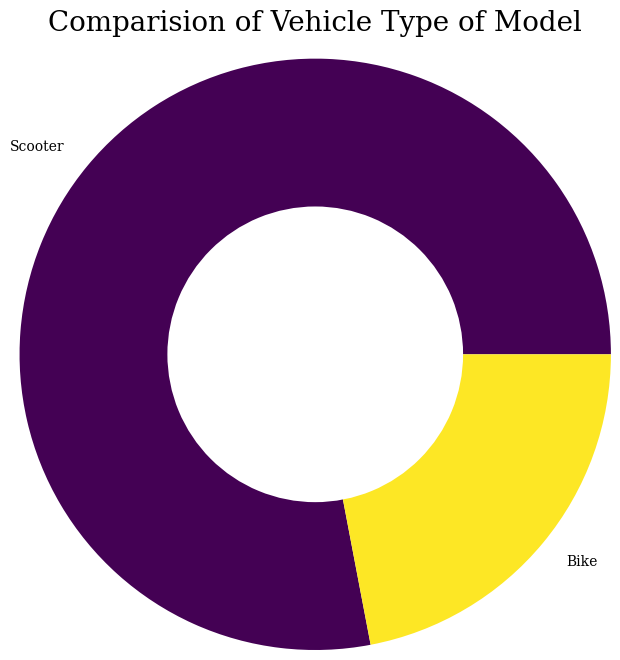

In [ ]:
x = df['Vehicle Type'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1, colors='white')
plt.title(label='Comparision of Vehicle Type of Model', family='serif', size=20, pad=100)
plt.ylabel('')
plt.show()

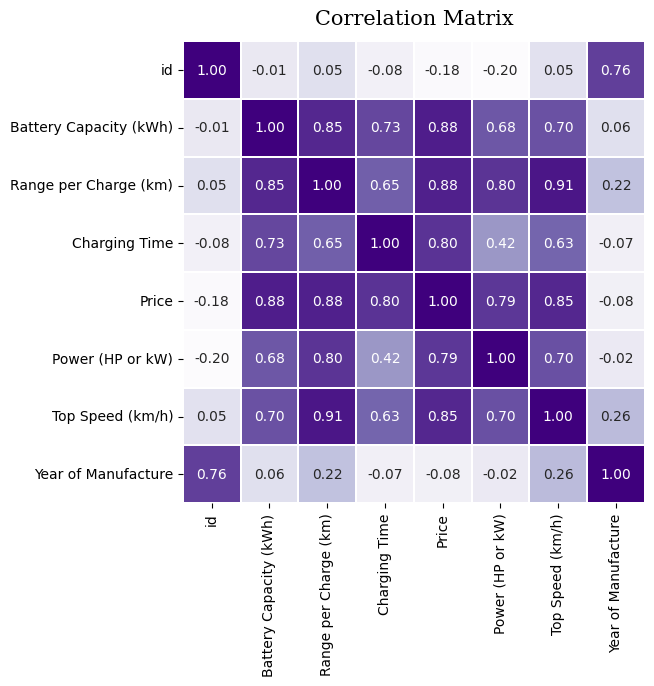

In [ ]:
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical columns
plt.figure(figsize=(6, 6))
sns.heatmap(data=numerical_df.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);
plt.show()

In [ ]:
df['Charging Time'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df['Price'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)


<ipython-input-51-d2df23bbf9f5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charging Time'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)
<ipython-input-51-d2df23bbf9f5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [ ]:
X = df[['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)','Top Speed (km/h)', 'Year of Manufacture']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median'
X_imputed = imputer.fit_transform(X)

# Now scale the imputed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA
pca = PCA(n_components=7) #Adjust the number of components according to the features of X
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']) #Adjust the number of principal components names
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.317054,-0.484297,0.520070,-0.723087,0.229557,-0.046162,-0.164962
1,-0.545757,-0.022609,-0.549403,-0.667349,-0.652381,-0.004869,-0.065933
2,0.056363,-3.051349,1.100326,0.661234,0.080357,-0.261154,-0.034371
3,-1.909336,-0.334090,-0.227087,0.183219,-0.054244,0.153663,0.172270
4,-2.502929,-0.408251,-0.176915,-0.007589,0.291972,-0.287084,-0.189345


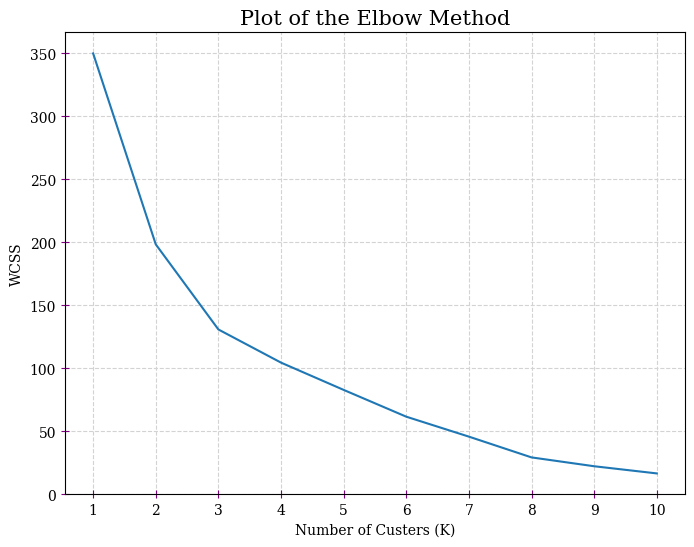

In [ ]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [ ]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [ ]:
print(kmean.labels_)

[3 1 0 1 1 2 3 0 3 1 1 1 2 3 3 1 1 1 2 3 1 1 1 3 1 1 3 3 1 1 1 1 3 1 3 1 1
 3 3 3 1 1 3 3 3 3 3 1 1 3]


In [ ]:
pd.Series(kmean.labels_).value_counts()

,count
1,25
3,20
2,3
0,2


In [ ]:
df['clusters'] = kmean.labels_

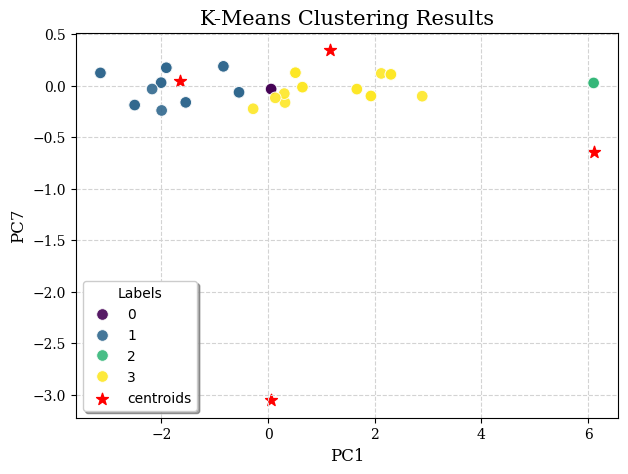

In [ ]:
# Assuming X_pca contains the principal components
df_pca = pd.DataFrame(X_pca)
df_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'] #and so on until the total number of PCs
#OR
#df_pca = df_pca[['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']] #select only the columns you want to use.


plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC7', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC7', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()